In [141]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
file_dir = 'C:/Users/1/Desktop/ДЗ/homework/HW_Data2'

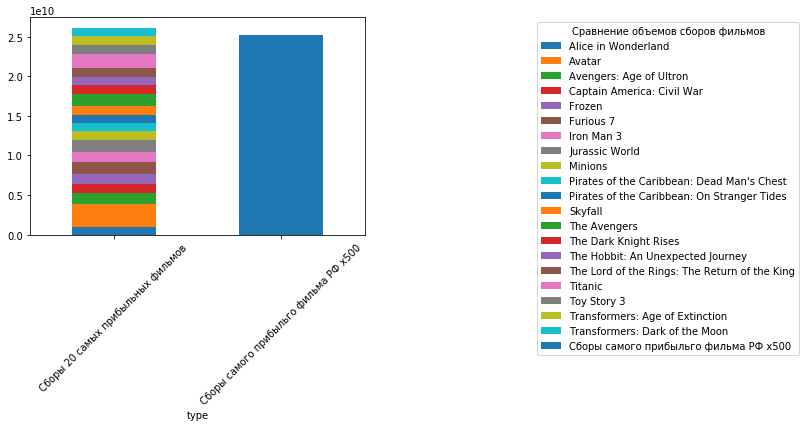

In [145]:
df = pd.read_csv(f'{file_dir}/tmdb_5000_movies.csv')
# print(df)
new_df=df.sort_values('revenue', ascending=False).head(20)
new_df['revenue'] = new_df.revenue.astype('int64')
new_df['type']='Сборы 20 самых прибыльных фильмов'
new_df1 = new_df[['title']+['revenue']+['type']].copy()
new_df1.loc[21] = {'revenue': 50263878*500,'title': 'Сборы самого прибыльго фильма РФ х500', 'type': 'Сборы самого прибыльго фильма РФ х500'}
new_df2 = new_df1.groupby(['title','type']).agg({
  "revenue": "sum"})
table = pd.pivot_table(new_df2, values ='revenue',index =['type'], columns =['title'], aggfunc = np.sum)
ar=table.plot(kind='bar',rot=45,stacked=True).legend(bbox_to_anchor=(1.5, 1))
ar.set_title('Сравнение объемов сборов фильмов')

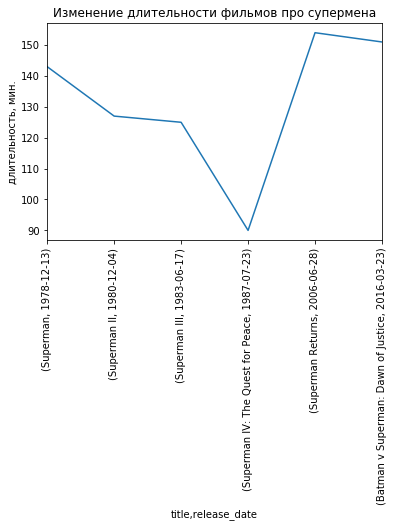

In [146]:
superman_df=df[df['title'].str.contains("Superman")]
superman_df = superman_df[['title']+['release_date']+['runtime']].copy()
superman_df=superman_df[superman_df['title'].str.contains("Superman")]
superman_df['runtime']= superman_df.runtime.astype('int64')
ax = superman_df.groupby(['title','release_date'])[['runtime']].sum().sort_values('release_date', ascending=True).plot(rot=90)
ax.set_title('Изменение длительности фильмов про супермена')
ax.set_ylabel('длительность, мин.')
ax.get_legend().remove()

Text(0.5, 1.0, 'Самые повторяемые слова в описании фильмов про Супермена')

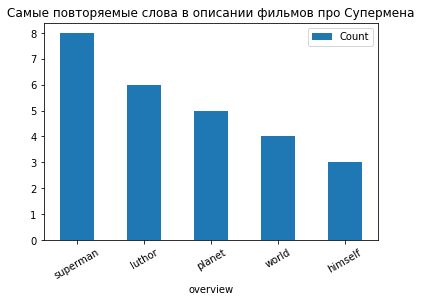

In [147]:
sup_df= df[df['title'].str.contains("Superman")]
sup_df['overview']
overview_df = sup_df[['title']+['overview']].copy()

def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res
regex_pat = re.compile(r'\.|\,|\b\w{1,4}\b|\-')
res = explode(overview_df.assign(overview=df['overview'].str.replace(regex_pat, '').str.lower().str.split(' ')), 'overview')
new_tab = res.groupby(['overview'])[['overview']].count()
new_tab2=new_tab.rename(columns={'overview':'Count'})
new_tab3=new_tab2.sort_values('Count', ascending=False)
ab=new_tab3[1:6].plot(kind='bar',rot=30)
ab.set_title('Самые повторяемые слова в описании фильмов про Супермена')


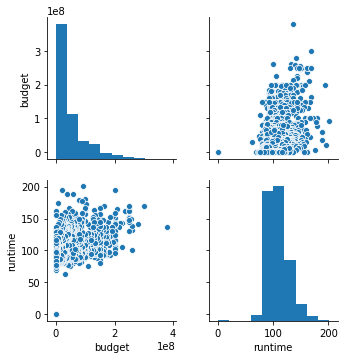

In [148]:
new_df = df.dropna().copy()
new_df['budget'].astype('int64')

sns_plot = sns.pairplot(
    new_df[['budget','runtime']])
sns_plot

Text(0.5, 0, 'Год')

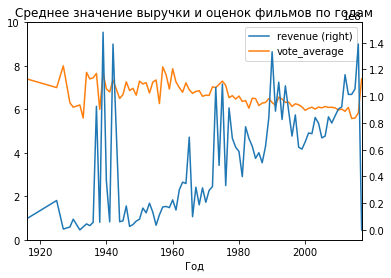

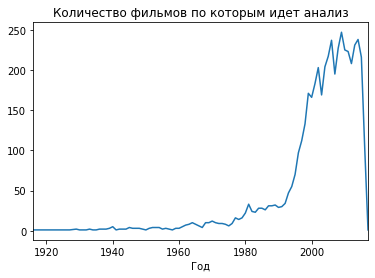

In [149]:
df_for_2 = df
df_for_2 = df_for_2[['release_date']+['revenue']+['vote_average']].copy()
df_for_2.dropna()
df_for_2['release_date'] = df_for_2.release_date.astype('datetime64[ns]')
df_for_2['release_date']=df_for_2['release_date'].dt.year
df_for_2_new=df_for_2.groupby(['release_date']).agg({
  "revenue": "mean","vote_average": "mean"})
revenue_vote_year = df_for_2_new.plot(secondary_y='revenue', ylim=[0,10])
revenue_vote_year.set_xlabel('Год')
revenue_vote_year.set_title('Среднее значение выручки и оценок фильмов по годам')
df_for_2_new=df_for_2.groupby(['release_date']).agg({
  "revenue": "count"})
count_films = df_for_2_new.plot(legend=False)
count_films.set_title('Количество фильмов по которым идет анализ')
count_films.set_xlabel('Год')

In [ ]:
\